Importar Librerías

In [2]:
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Definición de lexicon a ocupar

In [ ]:
# from translate import Translator

# def translate_text(text, target_language='es'):
#     translator= Translator(to_lang=target_language)
#     translation = translator.translate(text)
#     return translation

# lexicon_en = pd.read_csv('lexicon_en.txt', sep='	', header=None)
# lexicon_en.columns = ['text','polarity','affinity','relay']

# text_es = pd.read_csv('just_titles.txt', sep='	', index_col=0, header=0, encoding='latin1')

# lexicon_es = lexicon_en.merge(text_es, right_index=True, left_index=True, how='left')

# lexicon_es['final_text'] = lexicon_es['texto'].fillna(lexicon_es['text'])

# lexicon_es.to_csv('lexicon_es.txt', columns=['final_text','polarity','affinity','relay'], sep='\t', header=None, index=False)
# lexicon_es

Definición dataset + sentiment analyzer

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer(lexicon_file='C:/Users/alniquia/OneDrive - Telefonica/Documents/Projects/cc_sentiment_analysis/lexicon_es.txt')

tweets = pd.read_csv('datasets/dataset_mencion1.csv')


Agregar polarity_score

In [105]:
def polarity_score(sentence):
	sentiment = sentiment_analyzer.polarity_scores(sentence)
	return sentiment['neg'], sentiment['neu'], sentiment['pos'], sentiment['compound']

tweets[['negativity_score', 'neutrality_score', 'positivity_score', 'compound_score']] = tweets['rawContent'].apply(polarity_score).apply(pd.Series)

tweets.head()

,date,id,rawContent,replyCount,retweetCount,likeCount,quoteCount,viewCount,lang,coordinates,...,user_location,user_verified,inReplyToTweetId,date_day,date_month,sentiment,negativity_score,neutrality_score,positivity_score,compound_score
0,2022-09-03 23:36:16+00:00,1566208484160536576,15.1 millones de electores chilenos están obli...,3,10,37,1,NaN,es,NaN,...,Bogotá/Key Biscayne,True,NaN,2022-09-03,2022-09,0.0,0.072,0.928,0.00,-0.2023
1,2022-09-03 23:32:04+00:00,1566207427837628417,#Chile Acá podrán seguir todos los datos respe...,0,0,0,0,NaN,es,NaN,...,NaN,False,NaN,2022-09-03,2022-09,0.0,0.000,1.000,0.00,0.0000
2,2022-09-03 23:12:21+00:00,1566202468878503936,@Rodolfo62949483 @Dany41135077 De aprobar o no...,1,1,1,0,NaN,es,NaN,...,NaN,False,1.566200e+18,2022-09-03,2022-09,0.0,0.260,0.740,0.00,-0.8316
3,2022-09-03 23:07:47+00:00,1566201318741385216,@bdelamaza Que más se podía esperar de un FACH...,0,0,0,0,NaN,es,NaN,...,NaN,False,1.565893e+18,2022-09-03,2022-09,0.0,0.000,0.940,0.06,0.1027
4,2022-09-03 23:05:51+00:00,1566200833225678850,Este domingo 4 de septiembre se llevará a cabo...,0,0,0,0,NaN,es,NaN,...,Santiago de Chile,False,NaN,2022-09-03,2022-09,0.0,0.084,0.916,0.00,-0.5423


Visualización

In [108]:
# set sns style
tweets['date'] = pd.to_datetime(tweets['date'])
tweets['date_day'] = tweets['date'].dt.date
tweets['date_month'] = tweets['date'].dt.strftime('%Y-%m')

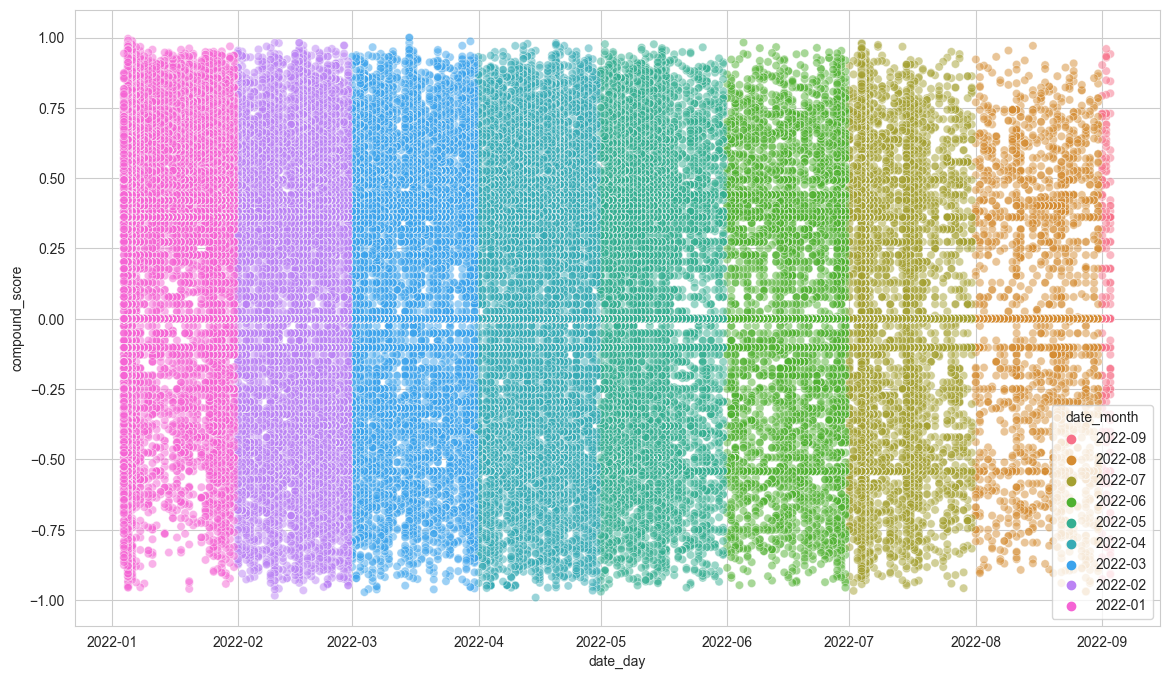

In [115]:
sns.set_style('whitegrid')
sns.set_palette('afmhot')

fig, ax = plt.subplots(figsize=(14, 8))
sns.scatterplot(x='date_day', y='compound_score', data=tweets, ax=ax, alpha=0.5, hue='date_month')
plt.show()

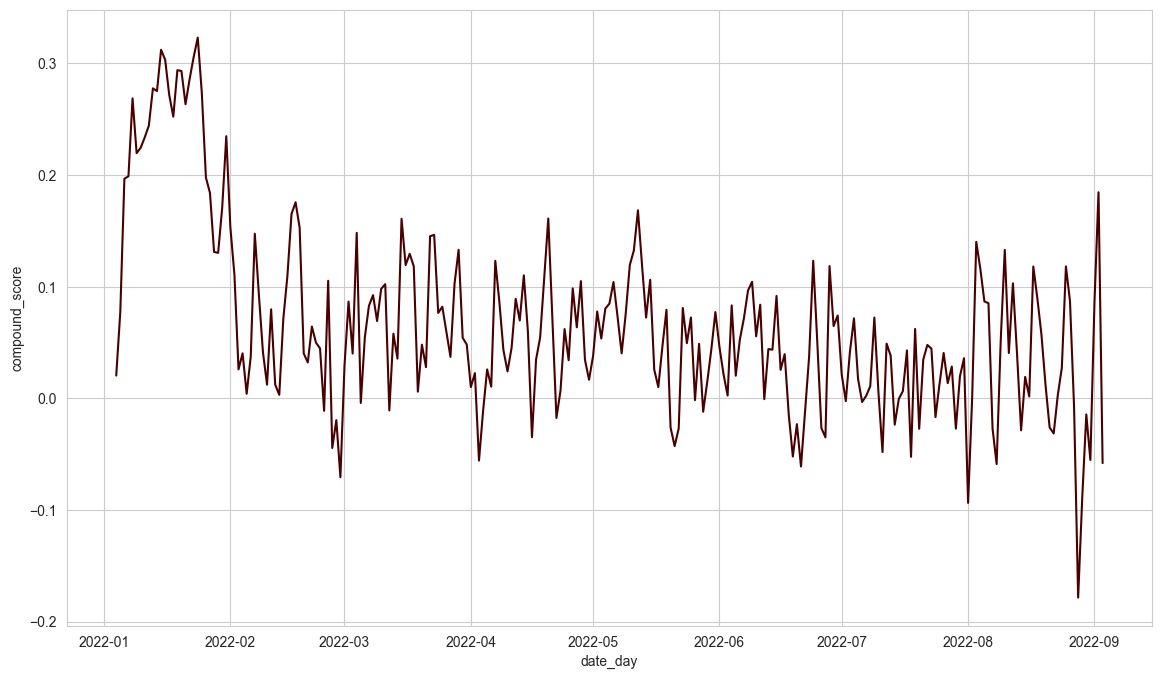

In [110]:
# plot sentimiento
avg_day = tweets[['date_day', 'compound_score']].groupby('date_day').mean()

fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(x=avg_day.index, y='compound_score', data=avg_day, ax=ax)
plt.show()